<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/Color_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%cd /content/drive/MyDrive/Notebooks/Nemo

/content/drive/MyDrive/Notebooks/Nemo


In [24]:
%ls

nemo0.jpg  nemo1.jpg  nemo2.jpg  nemo3.jpg  nemo4.jpg  nemo5.jpg


In [26]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb

In [27]:
flags = [i for i in dir(cv2) if i.startswith("COLOR_")]
print(len(flags), "flags total:")

274 flags total:


In [37]:
print(flags[44])

COLOR_BGR2LAB


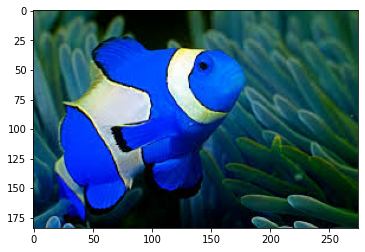

In [38]:
nemo = cv2.imread("/content/drive/MyDrive/Notebooks/Nemo/nemo0.jpg")
plt.imshow(nemo)
plt.show()

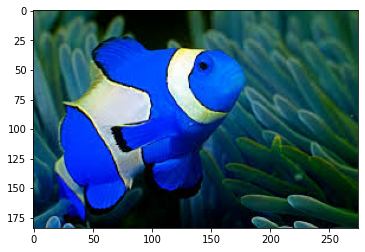

In [40]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [49]:
r, g, b = cv2.split(nemo)

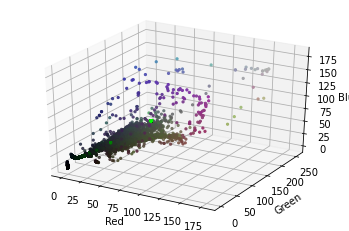

In [51]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()


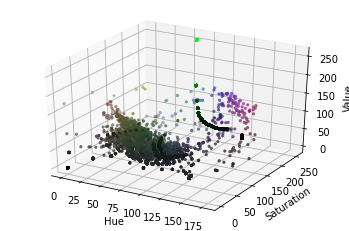

In [53]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

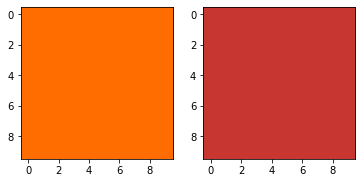

In [54]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# Normalise to 0 - 1 range for viewing

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [60]:
# Segment Nemo using inRange() function
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
# Bitwise-AND mask and original image
result = cv2.bitwise_and(nemo, nemo, mask=mask)

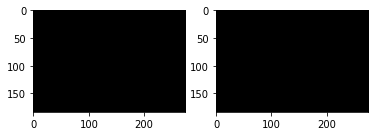

In [62]:
# Convert back to RGB in order to plot using `matplotlib.pyplot`
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

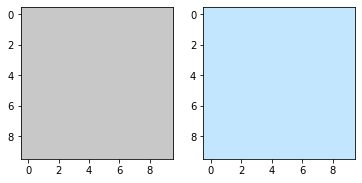

In [56]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

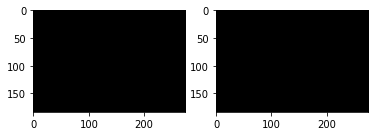

In [57]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()


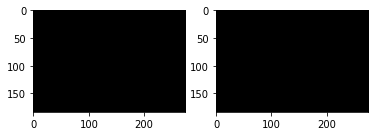

In [58]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

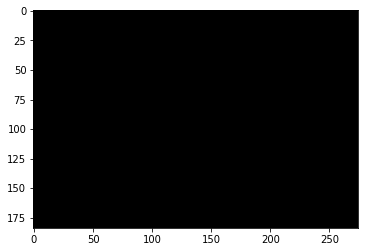

In [59]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)

plt.imshow(blur)
plt.show()



In [72]:
path = "/content/drive/MyDrive/Notebooks/nemo/"

nemos_friends = []
for i in range(6):
   friend = cv2.cvtColor(cv2.imread(path +"nemo"+str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   nemos_friends.append(friend)

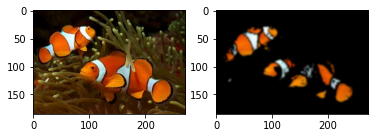

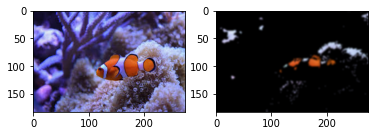

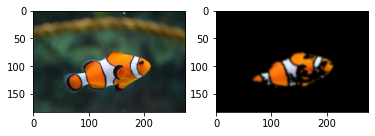

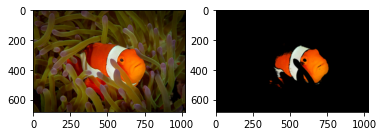

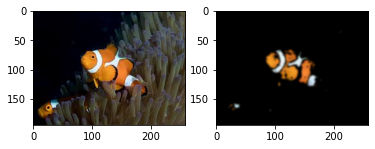

In [73]:
def segment_fish(image):
    """Attempts to segment the clown fish out of the provided image."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    result = cv2.GaussianBlur(result, (7, 7), 0)
    return result


results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()